🚀 Marketing Use Case for a Classifier: Shipping Recommendation System

📋 Project Overview

In the context of an e-commerce business offering multiple shipping options—standard, fast, express, and in-store pickup—the goal of this project is to utilize a classifier to precisely recommend the most suitable shipping option for each customer or order. This aims to optimize both the customer experience and shipping costs. 🛒📦

# Upload dataset in google collab

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Global_superstore.xlsx to Global_superstore.xlsx


# Installing TensorFlow Decision Forests
# Install TF-DF by running the following cell.

In [2]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0

In [3]:
!pip install wurlitzer

# Importing libraries

In [4]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [5]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.6.0


# ++++++++ Marketing Use Case for a Classifier: ++++++++
In the context of an e-commerce business offering multiple shipping options, including standard, fast, express, and in-store pickup, the marketing problem is to utilize a classifier to precisely recommend the most suitable shipping option for each customer or order. This aims to optimize both the customer experience and shipping costs.



# Dataset Description:

- The "Global Superstore" dataset contains information about customer orders, including order IDs, shipping modes (standard, fast, express, in-store pickup), customer details, product details, sales, discounts, profits, shipping costs, and more.

- The dataset represents sales and order data for a global retail company, likely collected over a period of time.
- The dataset often includes additional information, such as customer demographics, shipping details, product descriptions, and more.



## Categorical Variables:

1. Order ID: A unique identifier for each customer order.
2. Ship Mode: The shipping method or mode chosen for the order (e.g., standard, express).
3. Customer ID: A unique identifier for each customer.
4. Customer Name: The name of the customer who placed the order.
5. Segment: The customer segment to which the customer belongs (e.g., consumer, corporate).
6. City: The city where the customer is located.
7. State: The state or province where the customer is located.
8. Country: The country where the customer is located.
9. Postal Code: The postal code or ZIP code of the customer's location.
10. Market: The market or market segment in which the order was placed.
11. Region: The region or geographic area associated with the customer's location.
12. Product ID: A unique identifier for each product.
13. Category: The product category (e.g., electronics, furniture).
14. Sub-Category: The sub-category of the product (e.g., laptops, chairs).
15. Product Name: The name or description of the product.
16. Order Priority: The priority level of the order (e.g., low, medium, high).


# Numerical Variables:

1. Row ID: An identifier for each row or record in the dataset.
2. Order Date: The date when the customer placed the order.
3. Ship Date: The date when the order was shipped.
4. Sales: The total sales amount for the order.
5. Quantity: The quantity of products ordered.
6. Discount: The discount applied to the order.
7. Profit: The profit generated from the order.
8. Shipping Cost: The cost associated with shipping the order

# Load the dataset and convert it in a tf.Dataset

In [6]:
# Load a dataset into a Pandas Dataframe.
superStore_df= pd.read_excel("Global_superstore.xlsx", sheet_name="Orders")



In [7]:
# Display the first 5 examples.
superStore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Feature Engineering

In [8]:
# rename columns

superStore_df.rename(columns={'Ship Mode': 'ShipMode'}, inplace=True)
superStore_df.rename(columns={'Shipping Cost': 'ShippingCost'}, inplace=True)
superStore_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
superStore_df

,Row ID,Order ID,Order Date,Ship Date,ShipMode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ShippingCost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


# Choose the Categotical and numerical variables required for permormance the model using Keras

In [9]:
# Column List
columnas_list = ['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
                     'Sales', 'Quantity', 'Discount', 'Profit', 'PostalCode', 'ShippingCost', 'ShipMode']

# new filter dataframe
filter_superStore_df = superStore_df[columnas_list]

In [10]:
filter_superStore_df

,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PostalCode,ShippingCost,ShipMode
0,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,10024.0,933.570,Same Day
1,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,NaN,923.630,Second Class
2,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,NaN,915.490,First Class
3,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,NaN,910.160,First Class
4,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,NaN,903.040,Same Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,NaN,0.010,Same Day
51286,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,77095.0,0.010,Standard Class
51287,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,93030.0,0.010,Same Day
51288,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,NaN,0.003,Standard Class


## # Encode the categorical labels as integers.

In [11]:
# Encode the categorical labels as integers.

# Name of the label column.
label = "ShipMode"

classes = filter_superStore_df[label].unique().tolist()
print(f"Label classes: {classes}")

filter_superStore_df[label] = filter_superStore_df[label].map(classes.index)

Label classes: ['Same Day', 'Second Class', 'First Class', 'Standard Class']


<ipython-input-11-9a41707b2d7c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_superStore_df[label] = filter_superStore_df[label].map(classes.index)


In [12]:
filter_superStore_df

,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PostalCode,ShippingCost,ShipMode
0,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,10024.0,933.570,0
1,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,NaN,923.630,1
2,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,NaN,915.490,2
3,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,NaN,910.160,2
4,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,NaN,903.040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,NaN,0.010,0
51286,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,77095.0,0.010,3
51287,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,93030.0,0.010,0
51288,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,NaN,0.003,3


# Split the dataset into training and testing:

In [13]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(filter_superStore_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

35936 examples in training, 15354 examples for testing.


## showing Train Dataset

In [14]:
train_ds_pd

,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PostalCode,ShippingCost,ShipMode
2,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,NaN,915.490,2
4,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,NaN,903.040,0
5,Corporate,Sydney,New South Wales,Australia,APAC,Oceania,Technology,Phones,2862.675,5,0.1,763.2750,NaN,897.350,1
6,Consumer,Porirua,Wellington,New Zealand,APAC,Oceania,Furniture,Chairs,1822.080,4,0.0,564.8400,NaN,894.770,2
7,Consumer,Hamilton,Waikato,New Zealand,APAC,Oceania,Furniture,Tables,5244.840,6,0.0,996.4800,NaN,878.380,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,Home Office,Townsville,Queensland,Australia,APAC,Oceania,Office Supplies,Binders,58.050,5,0.1,19.9500,NaN,0.010,3
51286,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,77095.0,0.010,3
51287,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,93030.0,0.010,0
51288,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,NaN,0.003,3


## showing Test Dataset

In [15]:
test_ds_pd

,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PostalCode,ShippingCost,ShipMode
0,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,10024.0,933.570,0
1,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,NaN,923.630,1
3,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,NaN,910.160,2
10,Corporate,Alexandria,Virginia,United States,US,South,Office Supplies,Supplies,4164.050,5,0.0,83.2810,22304.0,846.540,1
11,Corporate,Kabul,Kabul,Afghanistan,APAC,Central Asia,Furniture,Tables,4626.150,5,0.0,647.5500,NaN,835.570,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51270,Consumer,Seattle,Washington,United States,US,West,Office Supplies,Binders,1.344,1,0.2,0.4704,98103.0,0.030,1
51272,Consumer,San José de las Lajas,Mayabeque,Cuba,LATAM,Caribbean,Office Supplies,Art,19.320,2,0.0,0.5600,NaN,0.025,1
51278,Consumer,Lagos,Lagos,Nigeria,Africa,Africa,Office Supplies,Art,5.364,1,0.7,-6.4560,NaN,0.020,1
51281,Consumer,Bragança Paulista,São Paulo,Brazil,LATAM,South,Office Supplies,Paper,84.000,5,0.0,9.2000,NaN,0.019,2


# convert the pandas dataframe (pd.Dataframe) into tensorflow datasets (tf.data Dataset)

In [16]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

# train model

In [17]:
#%set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpiwiguc8e as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Segment': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'City': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'State': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Country': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Market': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'Region': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'Category': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'Sub-Category': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Sales': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Quantity': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'Discount': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'Profit': <tf.Tensor 'data_11:0' shape=(None,) dtype=float64>, 'PostalCode': <tf.Tensor 'data_12:0' shape=(None,) dtype=float64>, 'ShippingCost': <tf.Tensor 'data_13:0' sha

[INFO 23-10-09 19:20:50.9538 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-10-09 19:20:50.9539 UTC kernel.cc:774] Collect training examples
[INFO 23-10-09 19:20:50.9539 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-10-09 19:20:50.9546 UTC kernel.cc:393] Number of batches: 36
[INFO 23-10-09 19:20:50.9546 UTC kernel.cc:394] Number of examples: 35936
[INFO 23-10-09 19:20:50.9745 UTC data_spec_inference.cc:305] 1764 item(s) have been pruned (i.e. they are considered out of dictionary) for the column City (1662 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-10-09 19:20:50.9758 UTC data_spec_i

Model trained in 0:28:31.776733
Compiling model...
Model compiled.


# Evaluate the model

In [18]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

16/16 [==============================] - 5s 241ms/step - loss: 0.0000e+00 - accuracy: 0.6426

loss: 0.0000
accuracy: 0.6426


# Prepare this model for TensorFlow Serving.

In [21]:
model_1.save("/tmp/my_superStore_save_model")

# Plot the model

In [22]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

# Summary

In [23]:
#%set_cell_height 300
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	Category
	City
	Country
	Discount
	Market
	PostalCode
	Profit
	Quantity
	Region
	Sales
	Segment
	ShippingCost
	State
	Sub-Category

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "ShippingCost"  0.340835 ################
    2.      "Country"  0.229620 #########
    3.        "Sales"  0.160190 #####
    4.         "City"  0.147406 ####
    5.        "State"  0.140076 ####
    6. "Sub-Category"  0.112359 ##
    7.       "Profit"  0.098900 #
    8.       "Region"  0.092218 #
    9.   "PostalCode"  0.075271 
   10.     "Quantity"  0.075204 
   11.     "Category"  0.074445 
   1

In [24]:
# The input features
model_1.make_inspector().features()

["Category" (4; #0),
 "City" (4; #1),
 "Country" (4; #2),
 "Discount" (1; #3),
 "Market" (4; #4),
 "PostalCode" (1; #5),
 "Profit" (1; #6),
 "Quantity" (1; #7),
 "Region" (4; #8),
 "Sales" (1; #9),
 "Segment" (4; #10),
 "ShippingCost" (1; #11),
 "State" (4; #12),
 "Sub-Category" (4; #13)]

In [25]:
# The feature importances
model_1.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("ShippingCost" (1; #11), 0.3408346295058063),
  ("Country" (4; #2), 0.2296202497232202),
  ("Sales" (1; #9), 0.16019028634119106),
  ("City" (4; #1), 0.14740573915592478),
  ("State" (4; #12), 0.1400757829638767),
  ("Sub-Category" (4; #13), 0.11235881070089439),
  ("Profit" (1; #6), 0.09890023372724999),
  ("Region" (4; #8), 0.0922182078204764),
  ("PostalCode" (1; #5), 0.0752713958630573),
  ("Quantity" (1; #7), 0.07520362379867597),
  ("Category" (4; #0), 0.07444505630171634),
  ("Segment" (4; #10), 0.07432317510516902),
  ("Market" (4; #4), 0.07386477634213057),
  ("Discount" (1; #3), 0.07275340826558466)],
 'NUM_NODES': [("City" (4; #1), 169280.0),
  ("State" (4; #12), 134688.0),
  ("Sub-Category" (4; #13), 113336.0),
  ("ShippingCost" (1; #11), 97568.0),
  ("Sales" (1; #9), 91795.0),
  ("Country" (4; #2), 75902.0),
  ("Profit" (1; #6), 68083.0),
  ("Quantity" (1; #7), 31851.0),
  ("Segment" (4; #10), 27509.0),
  ("Region" (4; #8), 26863.0),
  ("Market" (4

# Model Self Evaluation

In [81]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=35943, accuracy=0.6464680188075564, loss=1.0036855244785867, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [82]:
#%set_cell_height 150
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=13185, accuracy=0.5230185817216534, loss=17.192152050945584, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=3, evaluation=Evaluation(num_examples=26842, accuracy=0.4916921242828403, loss=14.629351893448632, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=5, evaluation=Evaluation(num_examples=32337, accuracy=0.4982218511302842, loss=12.537789934085506, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=8, evaluation=Evaluation(num_examples=35052, accuracy=0.526503480543193, loss=9.772622506436788, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=35687, accuracy=0.5554123350239583, loss=7.832090897779936, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=13, evaluation=Evaluation(num_examples=35845, accuracy=0.5700376621565072, loss=6.944989391169483, rms

# plot

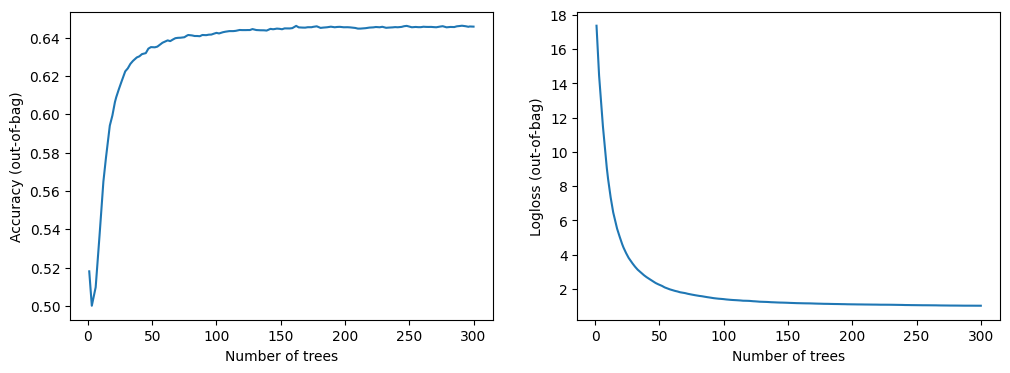

In [26]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# Predict values using test_ds

In [31]:
#%set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(test_ds)

Use 2 thread(s) for training
Use /tmp/tmpjucts6yf as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Segment': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'City': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'State': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Country': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Market': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'Region': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'Category': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'Sub-Category': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Sales': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Quantity': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'Discount': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'Profit': <tf.Tensor 'data_11:0' shape=(None,) dtype=float64>, 'PostalCode': <tf.Tensor 'data_12:0' shape=(None,) dtype=float64>, 'ShippingCost': <tf.Tensor 'data_13:0' sha

[INFO 23-10-09 21:06:59.1727 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-10-09 21:06:59.1727 UTC kernel.cc:774] Collect training examples
[INFO 23-10-09 21:06:59.1727 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-10-09 21:06:59.1729 UTC kernel.cc:393] Number of batches: 16
[INFO 23-10-09 21:06:59.1729 UTC kernel.cc:394] Number of examples: 15354
[INFO 23-10-09 21:06:59.1820 UTC data_spec_inference.cc:305] 2035 item(s) have been pruned (i.e. they are considered out of dictionary) for the column City (768 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-10-09 21:06:59.1827 UTC data_spec_in

Model trained in 0:09:40.259909
Compiling model...
Model compiled.


In [33]:
predictions = model_1.predict(test_ds)



16/16 [==============================] - 5s 293ms/step


In [35]:
# get the real tags for test dataset
true_labels = [label for features, label in test_ds]

# compare predictions with real tags
for i, (predicted_label, true_label) in enumerate(zip(predictions, true_labels)):
    predicted_label = predictions[i]
    true_label = true_labels[i]

    print(f"Ejemplo {i + 1}:")
    print(f"Predicción: {predicted_label}")
    print(f"Etiqueta Real: {true_label}")
    print()

Ejemplo 1:
Predicción: [0.3433331  0.1899999  0.11999995 0.34666643]
Etiqueta Real: [0 1 2 1 2 0 2 2 2 1 0 1 3 3 3 3 0 1 1 2 2 1 0 2 0 2 1 0 1 3 0 1 0 3 0 1 2
 1 1 3 1 2 0 2 2 0 1 3 3 3 2 2 2 3 2 2 3 3 1 1 3 3 0 0 1 3 2 2 2 3 2 1 1 2
 3 1 1 1 2 3 3 2 2 3 1 1 2 2 3 2 2 1 3 3 2 0 3 1 0 3 1 2 2 1 0 1 3 2 1 0 2
 3 2 2 1 2 0 2 1 3 2 1 1 3 2 2 3 1 1 0 1 2 2 1 2 1 2 2 1 1 1 3 0 0 3 3 3 3
 1 2 3 3 2 0 1 2 3 2 2 1 1 1 1 1 2 2 1 2 1 3 3 3 2 1 3 0 3 1 2 3 3 1 3 1 3
 0 3 1 3 3 3 3 3 1 0 0 1 2 1 3 3 1 1 2 1 3 2 1 0 1 0 2 3 3 2 3 3 2 0 1 2 3
 0 3 1 3 2 1 3 3 2 1 3 2 3 3 0 1 1 0 3 1 0 3 2 2 3 0 1 2 3 3 3 2 3 3 1 3 2
 3 1 1 0 3 3 2 3 3 3 2 0 2 3 3 3 0 1 2 1 1 3 3 3 3 2 1 2 3 2 2 2 2 1 1 1 3
 2 1 3 1 3 3 3 3 3 2 3 2 2 3 1 1 2 2 3 0 3 1 1 0 2 3 2 2 1 0 3 2 1 1 3 1 3
 3 3 3 1 1 3 0 1 1 3 3 3 2 2 3 3 1 3 3 1 3 1 0 2 1 2 0 1 2 3 1 2 2 3 3 0 2
 1 1 0 2 0 0 0 2 0 3 0 2 0 0 0 1 1 1 2 1 0 0 1 3 0 0 2 2 3 3 2 0 1 2 0 3 3
 3 3 3 2 1 2 3 2 2 3 3 3 3 0 0 3 1 3 3 2 3 2 3 2 1 2 2 3 0 3 2 3 3 3 3 3 3
 2 2 2 1 1 1 0 2

# The outcome of using a predictive model for the "Ship Mode" variable in the context of an e-commerce business helps solve the marketing problem identified.

- Optimizing Shipping Options: The marketing problem involves offering the most suitable shipping option for each customer or order to optimize both the customer experience and shipping costs. By using a predictive model, you can accomplish the following:

- Predictive model for "Ship Mode" allows the e-commerce business to make informed and personalized shipping recommendations, balancing customer satisfaction and cost-effectiveness. This approach directly addresses the marketing problem of optimizing shipping options to enhance the customer experience while managing shipping costs efficiently.

# Here's how it addresses the marketing problem:

1. Personalized Recommendations: The model can analyze various features related to each order, such as customer segment, location, order value, and more. Based on this analysis, it can make personalized recommendations for the most appropriate shipping option for each order.

2. Improved Customer Experience: By recommending the right shipping option, the e-commerce business can enhance the overall customer experience. Customers receive their orders in a manner that aligns with their preferences, whether they prioritize speed, cost, or convenience.

3. Cost Optimization: The model can take into account the cost implications of different shipping options. It can balance the desire for a great customer experience with the need to manage shipping costs efficiently. For example, it can recommend lower-cost options for less urgent orders.

4. Reduced Abandoned Carts: Providing clear and suitable shipping options can reduce cart abandonment rates. Customers are more likely to complete their orders if they see shipping choices that meet their expectations.

5. Data-Driven Decisions: By leveraging a classifier model, the e-commerce business can make data-driven decisions about shipping. This can lead to more efficient allocation of resources, inventory management, and pricing strategies.

6. Continuous Improvement: The model can be continuously updated and improved based on new data and customer feedback. This ensures that the shipping recommendations remain relevant and aligned with customer preferences over time.

# The benefits of using a predictive model for shipping mode recommendation in the context of an e-commerce business offering multiple shipping options include:

1. Enhanced Customer Experience: The model ensures that customers receive their orders in a manner aligned with their preferences, whether it's for speed, cost-efficiency, or convenience. This leads to improved customer satisfaction and loyalty.

2. Cost Optimization: By considering the cost implications of different shipping options, the model helps the business balance the desire to provide an excellent customer experience with the need to manage shipping costs efficiently. This can result in improved profitability.

3. Reduced Cart Abandonment: Clear and appropriate shipping options can reduce cart abandonment rates. When customers see shipping choices that match their expectations, they are more likely to complete their purchases, leading to increased sales.

4. Data-Driven Decision-Making: The model enables data-driven decisions related to shipping, including resource allocation, inventory management, and pricing strategies. This helps the business make informed decisions to maximize efficiency and profitability.

5. Continuous Improvement: The model can be regularly updated and improved based on new data and customer feedback. This ensures that shipping recommendations remain relevant and aligned with evolving customer preferences.

5. Competitive Advantage: Utilizing advanced predictive analytics for shipping recommendations sets the business apart from competitors. It positions the company as customer-centric and forward-thinking, potentially attracting more customers.

6. Customer Loyalty: Satisfied customers are more likely to become loyal customers who make repeat purchases and recommend the business to others. Accurate shipping recommendations contribute to building customer loyalty.

7. Cost-Efficient Marketing Spend: Marketing resources are spent more efficiently by targeting customers with shipping options that match their preferences. This optimization helps maximize the return on investment for marketing campaigns.

8. Inventory Management: The model can help in managing inventory levels more effectively by anticipating demand based on historical shipping data. This prevents overstocking or understocking issues.

9. Operational Efficiency: By suggesting the most suitable shipping options, the model can optimize the logistics and supply chain operations of the business, leading to smoother and more cost-effective order fulfillment processes.

10. Reduced Customer Complaints: When customers receive orders in a manner that meets their expectations, there are fewer instances of shipping-related complaints, leading to improved customer service and reduced operational overhead.

12. Flexibility and Adaptability: The model can adapt to changing market conditions, customer preferences, and business goals. This flexibility ensures that the shipping recommendations remain effective over time.

# How would you communicate these benefits to a Marketing Manager?

 I want to share an exciting opportunity that can significantly enhance the marketing strategies and customer experience. We have a predictive model for shipping mode recommendation, and its benefits are substantial.

- First and foremost, this model improves the customer experience. It ensures that each customer receives their order exactly as they prefer, whether they prioritize speed, cost-effectiveness, or convenience. This level of personalization leads to happier customers who are more likely to become loyal, repeat buyers.

- In addition to improving customer satisfaction, the model optimizes costs. It takes into account the cost implications of different shipping options, allowing us to balance an exceptional customer experience with cost efficiency. The result is improved profitability for our business.

- One of the most promising benefits is the reduction in cart abandonment rates. When customers see shipping options that align with their expectations, they are more likely to complete their purchases. This directly translates into increased sales and revenue.

- The model also empowers us with data-driven decision-making. We can allocate resources more efficiently, manage inventory effectively, and fine-tune pricing strategies based on insights from the model. This data-driven approach positions us as more competitive and agile in the market.